In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.datasets import make_blobs, load_iris
from sklearn.decomposition import PCA as SklearnPCA
from sklearn.cluster import KMeans as SklearnKMeans
from itertools import permutations
import time
import sklearn


## Part 1: Eigenvalue Calculations (Practice)

Before using NumPy, let's practice calculating eigenvalues and eigenvectors manually to deepen our understanding.

**Example 1: Simple 2×2 Matrix**

Consider the matrix: $\mathbf{A} = \begin{bmatrix} 4 & 2 \\ 1 & 3 \end{bmatrix}$

**Step 1: Find the characteristic polynomial**
$$\det(\mathbf{A} - \lambda\mathbf{I}) = \det\begin{bmatrix} 4-\lambda & 2 \\ 1 & 3-\lambda \end{bmatrix}$$

$$= (4-\lambda)(3-\lambda) - (2)(1) = \lambda^2 - 7\lambda + 10$$

**Step 2: Solve for eigenvalues**
$$\lambda^2 - 7\lambda + 10 = 0$$
$$(\lambda - 5)(\lambda - 2) = 0$$

Therefore: $\lambda_1 = 5, \lambda_2 = 2$

**Step 3: Find eigenvectors**

For $\lambda_1 = 5$:
$$(\mathbf{A} - 5\mathbf{I})\mathbf{v} = \mathbf{0}$$
$$\begin{bmatrix} -1 & 2 \\ 1 & -2 \end{bmatrix}\begin{bmatrix} v_1 \\ v_2 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$$

This gives us: $-v_1 + 2v_2 = 0 \Rightarrow v_1 = 2v_2$

Choosing $v_2 = 1$: $\mathbf{v_1} = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$

For $\lambda_2 = 2$:
$$(\mathbf{A} - 2\mathbf{I})\mathbf{v} = \mathbf{0}$$
$$\begin{bmatrix} 2 & 2 \\ 1 & 1 \end{bmatrix}\begin{bmatrix} v_1 \\ v_2 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$$

This gives us: $2v_1 + 2v_2 = 0 \Rightarrow v_1 = -v_2$

Choosing $v_2 = 1$: $\mathbf{v_2} = \begin{bmatrix} -1 \\ 1 \end{bmatrix}$

Trước khi sử dụng NumPy, hãy cùng thực hành tính toán giá trị riêng (eigenvalue) và vectơ riêng (eigenvector) bằng tay để hiểu sâu hơn.

---

**Ví dụ 1: Ma trận 2×2 đơn giản**

Xét ma trận: $\mathbf{A} = \begin{bmatrix} 4 & 2 \\ 1 & 3 \end{bmatrix}$

**Bước 1: Tìm đa thức đặc trưng**
$$\det(\mathbf{A} - \lambda\mathbf{I}) = \det\begin{bmatrix} 4-\lambda & 2 \\ 1 & 3-\lambda \end{bmatrix}$$

$$= (4-\lambda)(3-\lambda) - (2)(1) = \lambda^2 - 7\lambda + 10$$

**Bước 2: Giải để tìm giá trị riêng**
$$\lambda^2 - 7\lambda + 10 = 0$$
$$(\lambda - 5)(\lambda - 2) = 0$$

Do đó: $\lambda_1 = 5, \lambda_2 = 2$

**Bước 3: Tìm vectơ riêng**

Đối với $\lambda_1 = 5$:
$$(\mathbf{A} - 5\mathbf{I})\mathbf{v} = \mathbf{0}$$
$$\begin{bmatrix} -1 & 2 \\ 1 & -2 \end{bmatrix}\begin{bmatrix} v_1 \\ v_2 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$$

Điều này cho ta: $-v_1 + 2v_2 = 0 \Rightarrow v_1 = 2v_2$

Chọn $v_2 = 1$: $\mathbf{v_1} = \begin{bmatrix} 2 \\ 1 \end{bmatrix}$

Đối với $\lambda_2 = 2$:
$$(\mathbf{A} - 2\mathbf{I})\mathbf{v} = \mathbf{0}$$
$$\begin{bmatrix} 2 & 2 \\ 1 & 1 \end{bmatrix}\begin{bmatrix} v_1 \\ v_2 \end{bmatrix} = \begin{bmatrix} 0 \\ 0 \end{bmatrix}$$

Điều này cho ta: $2v_1 + 2v_2 = 0 \Rightarrow v_1 = -v_2$

Chọn $v_2 = 1$: $\mathbf{v_2} = \begin{bmatrix} -1 \\ 1 \end{bmatrix}$



In [3]:
# Verification of Manual Calculations

def verify_manual_calculation():
    """
    Let's verify our manual calculations with NumPy and visualize the results.
    """
    print("VERIFYING MANUAL EIGENVALUE CALCULATIONS")
    print("=" * 50)

    # Example matrix from the theory
    A = np.array([[4, 2],
                  [1, 3]])

    print("Matrix A:")
    print(A)

    # Calculate using NumPy
    eigenvals_A, eigenvecs_A = np.linalg.eig(A)

    print(f"\nNumPy Results for Matrix A:")
    print(f"Eigenvalues: {eigenvals_A}")
    print(f"Our manual calculation: [5, 2]")

    print(f"\nEigenvectors:")
    print(eigenvecs_A.T)

matrices_results = verify_manual_calculation()


VERIFYING MANUAL EIGENVALUE CALCULATIONS
Matrix A:
[[4 2]
 [1 3]]

NumPy Results for Matrix A:
Eigenvalues: [5. 2.]
Our manual calculation: [5, 2]

Eigenvectors:
[[ 0.89442719  0.4472136 ]
 [-0.70710678  0.70710678]]


## Part 2: Understanding Covariance and Data Relationships

### What is Covariance?

**Covariance** measures how two variables change together. It's fundamental to understanding PCA.

**Mathematical Definition:**
For two variables $X$ and $Y$ with means $\mu_X$ and $\mu_Y$:

$$\text{Cov}(X,Y) = \mathbb{E}[(X - \mu_X)(Y - \mu_Y)] = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \mu_X)(y_i - \mu_Y)$$

**Interpretation:**
- **Positive covariance**: Variables tend to increase together
- **Negative covariance**: One increases while the other decreases  
- **Zero covariance**: Variables are uncorrelated

**Covariance Matrix:**
For a dataset with $d$ features, the covariance matrix is $d \times d$:

$$\mathbf{C} = \begin{bmatrix}
\text{Var}(X_1) & \text{Cov}(X_1,X_2) & \cdots & \text{Cov}(X_1,X_d) \\
\text{Cov}(X_2,X_1) & \text{Var}(X_2) & \cdots & \text{Cov}(X_2,X_d) \\
\vdots & \vdots & \ddots & \vdots \\
\text{Cov}(X_d,X_1) & \text{Cov}(X_d,X_2) & \cdots & \text{Var}(X_d)
\end{bmatrix}$$

**Key Properties:**
- **Diagonal elements**: Variances of individual features
- **Off-diagonal elements**: Covariances between feature pairs
- **Symmetric matrix**: $\text{Cov}(X_i,X_j) = \text{Cov}(X_j,X_i)$
- **Positive semi-definite**: All eigenvalues ≥ 0

**Hiệp phương sai (Covariance)** đo lường mức độ hai biến thay đổi cùng nhau. Đây là khái niệm cơ bản để hiểu PCA.

**Định nghĩa toán học:**
Đối với hai biến $X$ và $Y$ với giá trị trung bình $\mu_X$ và $\mu_Y$:

$$\text{Cov}(X,Y) = \mathbb{E}[(X - \mu_X)(Y - \mu_Y)] = \frac{1}{n-1}\sum_{i=1}^{n}(x_i - \mu_X)(y_i - \mu_Y)$$

**Giải thích:**
- **Hiệp phương sai dương**: Các biến có xu hướng tăng cùng nhau
- **Hiệp phương sai âm**: Một biến tăng trong khi biến kia giảm
- **Hiệp phương sai bằng không**: Các biến không tương quan

**Ma trận hiệp phương sai:**
Đối với một bộ dữ liệu có $d$ đặc trưng, ma trận hiệp phương sai có kích thước $d \times d$:

$$\mathbf{C} = \begin{bmatrix}
\text{Var}(X_1) & \text{Cov}(X_1,X_2) & \cdots & \text{Cov}(X_1,X_d) \\
\text{Cov}(X_2,X_1) & \text{Var}(X_2) & \cdots & \text{Cov}(X_2,X_d) \\
\vdots & \vdots & \ddots & \vdots \\
\text{Cov}(X_d,X_1) & \text{Cov}(X_d,X_2) & \cdots & \text{Var}(X_d)
\end{bmatrix}$$

**Các tính chất chính:**
- **Các phần tử trên đường chéo chính**: Phương sai của từng đặc trưng riêng lẻ
- **Các phần tử ngoài đường chéo chính**: Hiệp phương sai giữa các cặp đặc trưng
- **Ma trận đối xứng**: $\text{Cov}(X_i,X_j) = \text{Cov}(X_j,X_i)$
- **Nửa xác định dương**: Tất cả các giá trị riêng $\ge 0$

### Manual Calculation Example

**Dataset:** Three 2D points: $(1,1)$, $(2,3)$, $(3,2)$

**Step 1: Calculate means**
$$\mu_x = \frac{1+2+3}{3} = 2, \quad \mu_y = \frac{1+3+2}{3} = 2$$

**Step 2: Center the data**
$$\text{Centered data: } (-1,-1), (0,1), (1,0)$$

**Step 3: Calculate covariance matrix**
$$\text{Var}(X) = \frac{(-1)^2 + 0^2 + 1^2}{3-1} = \frac{2}{2} = 1$$

$$\text{Var}(Y) = \frac{(-1)^2 + 1^2 + 0^2}{3-1} = \frac{2}{2} = 1$$

$$\text{Cov}(X,Y) = \frac{(-1)(-1) + (0)(1) + (1)(0)}{3-1} = \frac{1}{2} = 0.5$$

**Result:** $\mathbf{C} = \begin{bmatrix} 1.0 & 0.5 \\ 0.5 & 1.0 \end{bmatrix}$


**Bộ dữ liệu:** Ba điểm 2D: $(1,1)$, $(2,3)$, $(3,2)$

**Bước 1: Tính toán giá trị trung bình**
$$\mu_x = \frac{1+2+3}{3} = 2, \quad \mu_y = \frac{1+3+2}{3} = 2$$

**Bước 2: Chuẩn hóa dữ liệu về tâm (Center the data)**
$$\text{Dữ liệu đã chuẩn hóa về tâm: } (-1,-1), (0,1), (1,0)$$

**Bước 3: Tính toán ma trận hiệp phương sai**
$$\text{Var}(X) = \frac{(-1)^2 + 0^2 + 1^2}{3-1} = \frac{2}{2} = 1$$

$$\text{Var}(Y) = \frac{(-1)^2 + 1^2 + 0^2}{3-1} = \frac{2}{2} = 1$$

$$\text{Cov}(X,Y) = \frac{(-1)(-1) + (0)(1) + (1)(0)}{3-1} = \frac{1}{2} = 0.5$$

**Kết quả:** $\mathbf{C} = \begin{bmatrix} 1.0 & 0.5 \\ 0.5 & 1.0 \end{bmatrix}$

Dataset (3 points in 2D):
[[1 1]
 [2 3]
 [3 2]]
Mean of X: 2.0
Mean of Y: 2.0

Centered data:
[[-1. -1.]
 [ 0.  1.]
 [ 1.  0.]]

Covariance Matrix:
[[1.  0.5]
 [0.5 1. ]]


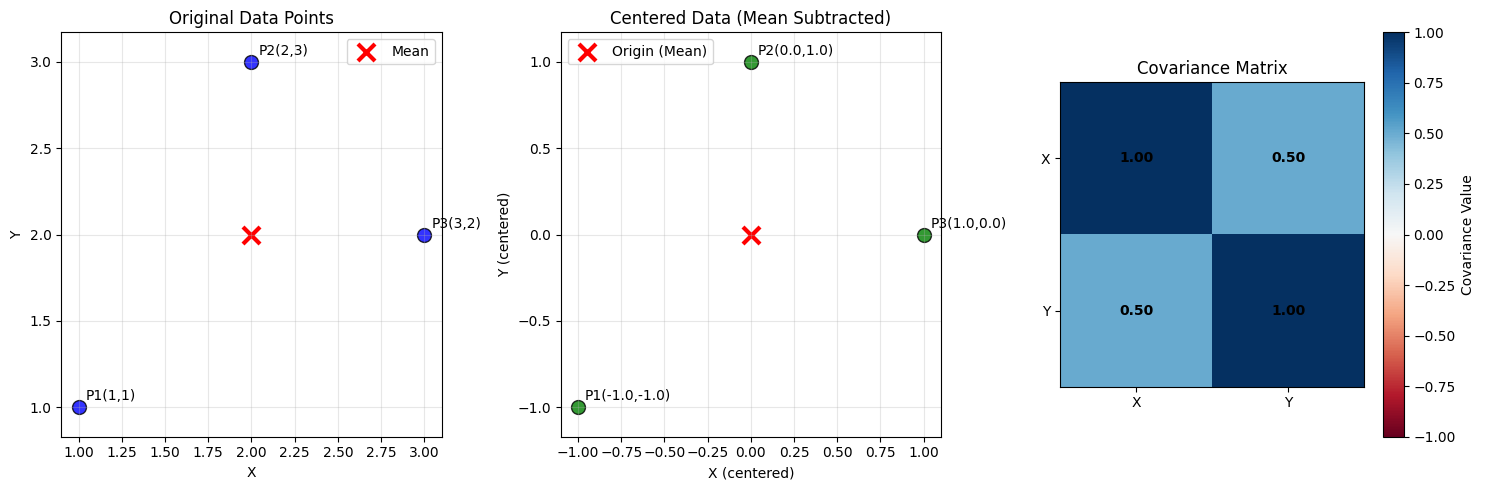

In [4]:
def covariance_calculation_exercise():
    # Example dataset: 3 points in 2D
    data_points = np.array([[1, 1],
                           [2, 3],
                           [3, 2]])

    print("Dataset (3 points in 2D):")
    print(data_points)

    # Step 1: Calculate means
    mean_x = np.mean(data_points[:, 0])
    mean_y = np.mean(data_points[:, 1])
    print(f"Mean of X: {mean_x}")
    print(f"Mean of Y: {mean_y}")

    # Step 2: Center the data
    centered_data = data_points - np.array([mean_x, mean_y])
    print(f"\nCentered data:")
    print(centered_data)

    # Step 3: Calculate variances and covariance manually
    n = len(data_points)

    var_x = np.sum(centered_data[:, 0]**2) / (n - 1)
    var_y = np.sum(centered_data[:, 1]**2) / (n - 1)
    cov_xy = np.sum(centered_data[:, 0] * centered_data[:, 1]) / (n - 1)

    manual_cov_matrix = np.array([[var_x, cov_xy],
                                  [cov_xy, var_y]])

    print(f"\nCovariance Matrix:")
    print(manual_cov_matrix)

    # Visualization
    plt.figure(figsize=(15, 5))

    # Plot 1: Original data
    plt.subplot(1, 3, 1)
    plt.scatter(data_points[:, 0], data_points[:, 1], c='blue', s=100, alpha=0.8, edgecolor='black')
    plt.scatter(mean_x, mean_y, c='red', s=150, marker='x', linewidth=3, label='Mean')

    # Add point labels
    for i, (x, y) in enumerate(data_points):
        plt.annotate(f'P{i+1}({x},{y})', (x, y), xytext=(5, 5), textcoords='offset points')

    plt.xlabel('X')
    plt.ylabel('Y')
    plt.title('Original Data Points')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')

    # Plot 2: Centered data
    plt.subplot(1, 3, 2)
    plt.scatter(centered_data[:, 0], centered_data[:, 1], c='green', s=100, alpha=0.8, edgecolor='black')
    plt.scatter(0, 0, c='red', s=150, marker='x', linewidth=3, label='Origin (Mean)')

    # Add point labels
    for i, (x, y) in enumerate(centered_data):
        plt.annotate(f'P{i+1}({x:.1f},{y:.1f})', (x, y), xytext=(5, 5), textcoords='offset points')

    plt.xlabel('X (centered)')
    plt.ylabel('Y (centered)')
    plt.title('Centered Data (Mean Subtracted)')
    plt.legend()
    plt.grid(True, alpha=0.3)
    plt.axis('equal')

    # Plot 3: Covariance matrix heatmap
    plt.subplot(1, 3, 3)
    im = plt.imshow(manual_cov_matrix, cmap='RdBu', vmin=-1, vmax=1)
    plt.colorbar(im, label='Covariance Value')

    # Add text annotations
    for i in range(2):
        for j in range(2):
            text = plt.text(j, i, f'{manual_cov_matrix[i, j]:.2f}',
                           ha="center", va="center", color="black", fontweight='bold')

    plt.xticks([0, 1], ['X', 'Y'])
    plt.yticks([0, 1], ['X', 'Y'])
    plt.title('Covariance Matrix')

    plt.tight_layout()
    plt.show()



    return data_points, manual_cov_matrix

# Run the exercise
exercise_results = covariance_calculation_exercise()


## Part 3: Principal Component Analysis (PCA) - Deep Theory

### The Big Picture: Why PCA?

**Problem:** Real-world data is often high-dimensional and contains redundancy.
- Images: Thousands of pixels, but many are correlated
- Genomics: Tens of thousands of genes, many with similar expression patterns
- Finance: Hundreds of stock prices, many move together

**Solution:** PCA finds the most important directions (principal components) in the data.

**Vấn đề:** Dữ liệu thực tế thường có số chiều cao và chứa sự dư thừa.
- Hình ảnh: Hàng ngàn điểm ảnh, nhưng nhiều điểm ảnh có tương quan với nhau
- Bộ gen: Hàng chục ngàn gen, nhiều gen có kiểu biểu hiện tương tự nhau
- Tài chính: Hàng trăm giá cổ phiếu, nhiều mã di chuyển cùng nhau

**Giải pháp:** PCA tìm ra các hướng quan trọng nhất (các thành phần chính) trong dữ liệu.

### Mathematical Foundation of PCA

**Core Idea:** Find new coordinate axes (principal components) such that:
1. **1st PC**: Direction of maximum variance
2. **2nd PC**: Direction of maximum remaining variance (orthogonal to 1st PC)
3. **3rd PC**: Direction of maximum remaining variance (orthogonal to 1st and 2nd PC)
4. And so on...

**Ý tưởng cốt lõi:** Tìm các trục tọa độ mới (các thành phần chính) sao cho:
1. **Thành phần chính thứ nhất (1st PC)**: Hướng có phương sai lớn nhất
2. **Thành phần chính thứ hai (2nd PC)**: Hướng có phương sai còn lại lớn nhất (trực giao với PC thứ nhất)
3. **Thành phần chính thứ ba (3rd PC)**: Hướng có phương sai còn lại lớn nhất (trực giao với PC thứ nhất và thứ hai)
4. Và cứ thế tiếp tục...

### Step-by-Step PCA Algorithm

**Input:** Data matrix $\mathbf{X} \in \mathbb{R}^{n \times d}$ (n samples, d features)

**Step 1: Standardize the data**
$$\mathbf{X}_{std} = \frac{\mathbf{X} - \boldsymbol{\mu}}{\boldsymbol{\sigma}}$$

where $\boldsymbol{\mu}$ is the mean vector and $\boldsymbol{\sigma}$ is the standard deviation vector.

**Step 2: Compute covariance matrix**
$$\mathbf{C} = \frac{1}{n-1}\mathbf{X}_{std}^T\mathbf{X}_{std}$$

**Step 3: Find eigenvalues and eigenvectors**
$$\mathbf{C}\mathbf{v}_i = \lambda_i\mathbf{v}_i$$

**Step 4: Sort by eigenvalue magnitude**
$$\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_d \geq 0$$

**Step 5: Select top k components**
$$\mathbf{W} = [\mathbf{v}_1, \mathbf{v}_2, \ldots, \mathbf{v}_k] \in \mathbb{R}^{d \times k}$$

**Step 6: Transform data**
$$\mathbf{Y} = \mathbf{X}_{std}\mathbf{W} \in \mathbb{R}^{n \times k}$$



**Đầu vào:** Ma trận dữ liệu $\mathbf{X} \in \mathbb{R}^{n \times d}$ (n mẫu, d đặc trưng)

**Bước 1: Chuẩn hóa dữ liệu**
$$\mathbf{X}_{std} = \frac{\mathbf{X} - \boldsymbol{\mu}}{\boldsymbol{\sigma}}$$

trong đó $\boldsymbol{\mu}$ là vectơ trung bình và $\boldsymbol{\sigma}$ là vectơ độ lệch chuẩn.

**Bước 2: Tính ma trận hiệp phương sai**
$$\mathbf{C} = \frac{1}{n-1}\mathbf{X}_{std}^T\mathbf{X}_{std}$$

**Bước 3: Tìm các giá trị riêng và vectơ riêng**
$$\mathbf{C}\mathbf{v}_i = \lambda_i\mathbf{v}_i$$

**Bước 4: Sắp xếp theo độ lớn giá trị riêng**
$$\lambda_1 \geq \lambda_2 \geq \cdots \geq \lambda_d \geq 0$$

**Bước 5: Chọn k thành phần hàng đầu**
$$\mathbf{W} = [\mathbf{v}_1, \mathbf{v}_2, \ldots, \mathbf{v}_k] \in \mathbb{R}^{d \times k}$$

**Bước 6: Biến đổi dữ liệu**
$$\mathbf{Y} = \mathbf{X}_{std}\mathbf{W} \in \mathbb{R}^{n \times k}$$

### Key PCA Properties

**1. Variance Maximization**
- 1st PC captures maximum variance possible in any single direction
- Each subsequent PC captures maximum remaining variance

**2. Orthogonality**
- All principal components are orthogonal (uncorrelated)
- $\mathbf{v}_i^T\mathbf{v}_j = 0$ for $i \neq j$

**3. Variance Explanation**
- Eigenvalue $\lambda_i$ = variance along PC $i$
- Explained variance ratio: $\frac{\lambda_i}{\sum_j \lambda_j}$

**4. Dimensionality Reduction**
- Keep only top $k < d$ components
- Retain most important information while reducing dimensions



**1. Tối đa hóa phương sai (Variance Maximization)**
- Thành phần chính thứ nhất (1st PC) nắm bắt phương sai tối đa có thể có theo bất kỳ hướng đơn lẻ nào
- Mỗi PC tiếp theo nắm bắt phương sai còn lại tối đa

**2. Tính trực giao (Orthogonality)**
- Tất cả các thành phần chính đều trực giao (không tương quan)
- $\mathbf{v}_i^T\mathbf{v}_j = 0$ với $i \neq j$

**3. Giải thích phương sai (Variance Explanation)**
- Giá trị riêng $\lambda_i$ = phương sai dọc theo PC $i$
- Tỷ lệ phương sai được giải thích: $\frac{\lambda_i}{\sum_j \lambda_j}$

**4. Giảm chiều (Dimensionality Reduction)**
- Chỉ giữ lại $k < d$ thành phần hàng đầu
- Giữ lại thông tin quan trọng nhất trong khi giảm số chiều

### Geometric Interpretation

**Original Space:** Data lives in $\mathbb{R}^d$
**PC Space:** Data projected onto $\mathbb{R}^k$ where $k < d$

The principal components form a new coordinate system that:
- **Aligns with data's natural structure**
- **Maximizes information retention**
- **Minimizes information loss**

**Không gian gốc:** Dữ liệu nằm trong $\mathbb{R}^d$
**Không gian PC:** Dữ liệu được chiếu lên $\mathbb{R}^k$ trong đó $k < d$

Các thành phần chính tạo thành một hệ tọa độ mới mà:
- **Phù hợp với cấu trúc tự nhiên của dữ liệu**
- **Tối đa hóa việc giữ lại thông tin**
- **Tối thiểu hóa việc mất thông tin**




## Implementing PCA from Scratch (Exercise)

### Your Task

Complete the `MyPCA` class implementation below. This exercise will help you understand the mathematical foundations of PCA by implementing each step from scratch.

**What you need to implement:**
1. Data standardization
2. Covariance matrix computation
3. Eigenvalue decomposition
4. Component selection and transformation
5. Explained variance calculation

**Key Implementation Points:**
- **Standardization**: $(X - \mu) / \sigma$ for each feature
- **Covariance**: $C = \frac{1}{n-1}X^T X$ for centered data
- **Eigendecomposition**: Find eigenvalues and eigenvectors of covariance matrix
- **Sorting**: Order components by decreasing eigenvalue magnitude
- **Transformation**: Project data onto selected principal components

Hãy hoàn thành việc triển khai lớp `MyPCA` dưới đây. Bài tập này sẽ giúp bạn hiểu các nền tảng toán học của PCA bằng cách triển khai từng bước từ đầu.

**Bạn cần triển khai những gì:**
1. Chuẩn hóa dữ liệu
2. Tính toán ma trận hiệp phương sai
3. Phân tích giá trị riêng
4. Lựa chọn và biến đổi thành phần
5. Tính toán phương sai được giải thích

**Các điểm triển khai chính:**
- **Chuẩn hóa**: $(X - \mu) / \sigma$ cho mỗi đặc trưng
- **Hiệp phương sai**: $C = \frac{1}{n-1}X^T X$ cho dữ liệu đã được căn giữa
- **Phân tích giá trị riêng**: Tìm giá trị riêng và vectơ riêng của ma trận hiệp phương sai
- **Sắp xếp**: Sắp xếp các thành phần theo thứ tự độ lớn giá trị riêng giảm dần
- **Biến đổi**: Chiếu dữ liệu lên các thành phần chính đã chọn


In [35]:
class MyPCA:
    """
    Principal Component Analysis implementation from scratch.

    This class demonstrates the mathematical foundations of PCA using eigenvalue decomposition.
    Students should complete the missing implementations marked with TODO.
    """

    def __init__(self, n_components):
        """
        Initialize PCA with specified number of components.

        Parameters:
        -----------
        n_components : int
            Number of principal components to keep
        """
        self.n_components = n_components
        self.components = None                              # Principal components (eigenvectors)
        self.mean = None                                    # Feature means for centering
        self.std = None                                     # Feature standard deviations for scaling
        self.explained_variance_ratio_ = None               # Proportion of variance explained by each component
        self.cumulative_explained_variance_ratio_ = None    # Cumulative explained variance

    def fit(self, X):
        """
        Fit PCA model to the data.

        Parameters:
        -----------
        X : numpy.ndarray
            Input data of shape (n_samples, n_features)

        Returns:
        --------
        self : MyPCA
            Fitted PCA object
        """
        # Convert to float to avoid integer division issues
        X = X.astype(float)
        n_samples, n_features = X.shape

        #  TODO 1: Compute mean and standard deviation for each feature
        # Hint: Use np.mean() and np.std() along axis=0
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

        #  TODO 2: Standardize the data: (X - mean) / std
        # This centers the data and scales to unit variance
        X_standardized = (X - self.mean) / self.std

        #  TODO 3: Compute the covariance matrix
        # For standardized data: C = (1/(n-1)) * X^T * X
        # Hint: Use np.cov() with rowvar=False, or implement manually (có thể dùng hàm có sẵn trong numpy hoặc tính thủ công theo công thức)
        cov_matrix = np.cov(X_standardized.T)

        #  TODO 4: Perform eigenvalue decomposition
        # Hint: Use np.linalg.eig() to get eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        #  TODO 5: Sort eigenvalues and eigenvectors in descending order, Ở đây tụi em có thể dùng phương pháp sort cơ bản (như selection sort cho dễ hiểu chứ
        # không cần dùng các hàm phức tạp như đáp án)
        # Hint: Use np.argsort()[::-1] to get indices for descending sort
        sorted_indices = np.argsort(eigenvalues.real)[::-1]
        sorted_eigenvalues = eigenvalues.real[sorted_indices]
        sorted_eigenvectors = eigenvectors[:, sorted_indices].real

        #  TODO 6: Select the top n_components (dùng slicing trong numpy để chọn k components -> k có thể là bao nhiêu cũng được miễn bé hơn chiều ban đầu
        # Ở dưới cùng anh sẽ có giải thích nên chọn k bằng bao nhiêu)
        # Store the principal components (eigenvectors)
        self.components = sorted_eigenvectors[:, :self.n_components]

        #  TODO 7: Calculate explained variance ratio (Xem markdown bên dưới cùng để hiểu rõ về EVR và CEVR)
        # This shows how much variance each component explains
        total_eigenvalues = np.sum(sorted_eigenvalues)
        if total_eigenvalues == 0:
            self.explained_variance_ratio_ = np.zeros(self.n_components)
        else:
            self.explained_variance_ratio_ = sorted_eigenvalues[:self.n_components] / total_eigenvalues

        #  TODO 8: Calculate cumulative explained variance ratio
        # Hint: Use np.cumsum()
        self.cumulative_explained_variance_ratio_ = np.cumsum(self.explained_variance_ratio_)

        return self

    def transform(self, X):
        """
        Transform data to principal component space.

        Parameters:
        -----------
        X : numpy.ndarray
            Data to transform of shape (n_samples, n_features)

        Returns:
        --------
        X_transformed : numpy.ndarray
            Transformed data of shape (n_samples, n_components)
        """
        # Convert to float
        X = X.astype(float)

        #  TODO 9: Standardize the data using fitted mean and std
        # Use the same standardization as during fit
        X_standardized = (X - self.mean) / self.std

        #  TODO 10: Project data onto principal components
        # Matrix multiplication: X_standardized @ self.components
        X_pca = np.dot(X_standardized, self.components)

        return X_pca

    def fit_transform(self, X):
        """
        Fit PCA and transform data in one step.

        Parameters:
        -----------
        X : numpy.ndarray
            Input data

        Returns:
        --------
        X_transformed : numpy.ndarray
            Transformed data
        """
        return self.fit(X).transform(X)


In [30]:
# Đáp án
class MyPCA:
    """
    Principal Component Analysis implementation from scratch.

    This class demonstrates the mathematical foundations of PCA using eigenvalue decomposition.
    Students should complete the missing implementations marked with TODO.
    """

    def __init__(self, n_components):
        """
        Initialize PCA with specified number of components.

        Parameters:
        -----------
        n_components : int
            Number of principal components to keep
        """
        self.n_components = n_components
        self.components = None                              # Principal components (eigenvectors)
        self.mean = None                                    # Feature means for centering
        self.std = None                                     # Feature standard deviations for scaling
        self.explained_variance_ratio_ = None               # Proportion of variance explained by each component
        self.cumulative_explained_variance_ratio_ = None    # Cumulative explained variance

    def fit(self, X):
        """
        Fit PCA model to the data.

        Parameters:
        -----------
        X : numpy.ndarray
            Input data of shape (n_samples, n_features)

        Returns:
        --------
        self : MyPCA
            Fitted PCA object
        """
        # Convert to float to avoid integer division issues
        X = X.astype(float)
        n_samples, n_features = X.shape

        # TODO 1: Compute mean and standard deviation for each feature
        # Hint: Use np.mean() and np.std() along axis=0
        self.mean = np.mean(X, axis=0)
        self.std = np.std(X, axis=0)

        # TODO 2: Standardize the data: (X - mean) / std
        # This centers the data and scales to unit variance
        X_standardized = (X - self.mean) / self.std

        # TODO 3: Compute the covariance matrix
        # For standardized data: C = (1/(n-1)) * X^T * X
        # Hint: Use np.cov() with rowvar=False, or implement manually
        cov_matrix = np.cov(X_standardized.T)

        # TODO 4: Perform eigenvalue decomposition
        # Hint: Use np.linalg.eig() to get eigenvalues and eigenvectors
        eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

        # TODO 5: Sort eigenvalues and eigenvectors in descending order
        # Hint: Use np.argsort()[::-1] to get indices for descending sort
        sorted_indices = np.argsort(eigenvalues.real)[::-1]
        sorted_eigenvalues = eigenvalues.real[sorted_indices]
        sorted_eigenvectors = eigenvectors[:, sorted_indices].real

        # TODO 6: Select the top n_components
        # Store the principal components (eigenvectors)
        self.components = sorted_eigenvectors[:, :self.n_components]

        # TODO 7: Calculate explained variance ratio
        # This shows how much variance each component explains
        total_eigenvalues = np.sum(sorted_eigenvalues)
        if total_eigenvalues == 0:
            self.explained_variance_ratio_ = np.zeros(self.n_components)
        else:
            self.explained_variance_ratio_ = sorted_eigenvalues[:self.n_components] / total_eigenvalues

        # TODO 8: Calculate cumulative explained variance ratio
        # Hint: Use np.cumsum()
        self.cumulative_explained_variance_ratio_ = np.cumsum(self.explained_variance_ratio_)

        return self

    def transform(self, X):
        """
        Transform data to principal component space.

        Parameters:
        -----------
        X : numpy.ndarray
            Data to transform of shape (n_samples, n_features)

        Returns:
        --------
        X_transformed : numpy.ndarray
            Transformed data of shape (n_samples, n_components)
        """
        # Convert to float
        X = X.astype(float)

        # TODO 9: Standardize the data using fitted mean and std
        # Use the same standardization as during fit
        X_standardized = (X - self.mean) / self.std

        # TODO 10: Project data onto principal components
        # Matrix multiplication: X_standardized @ self.components
        X_pca = np.dot(X_standardized, self.components)

        return X_pca

    def fit_transform(self, X):
        """
        Fit PCA and transform data in one step.

        Parameters:
        -----------
        X : numpy.ndarray
            Input data

        Returns:
        --------
        X_transformed : numpy.ndarray
            Transformed data
        """
        return self.fit(X).transform(X)




## Part 4: K-Means Clustering - Mathematical Foundations

### What is Clustering?

**Clustering** is the task of grouping similar data points together without knowing the true labels beforehand. It's an **unsupervised learning** problem.

**Goal:** Partition $n$ data points into $k$ clusters such that:
- Points within the same cluster are similar
- Points in different clusters are dissimilar


**Phân cụm (Clustering)** là nhiệm vụ nhóm các điểm dữ liệu tương tự lại với nhau mà không biết trước nhãn thực sự. Đây là một bài toán **học không giám sát**.

**Mục tiêu:** Phân chia $n$ điểm dữ liệu thành $k$ cụm sao cho:
- Các điểm trong cùng một cụm tương tự nhau
- Các điểm trong các cụm khác nhau thì không tương tự nhau

### K-Means Algorithm: Mathematical Formulation

**Objective Function:** Minimize within-cluster sum of squares (WCSS)

$$J = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2$$

where:
- $C_i$ = set of points in cluster $i$
- $\mu_i$ = centroid (mean) of cluster $i$
- $k$ = number of clusters

**Hàm mục tiêu:** Tối thiểu hóa tổng bình phương trong cụm (WCSS)

$$J = \sum_{i=1}^{k} \sum_{x \in C_i} ||x - \mu_i||^2$$

Trong đó:
- $C_i$ = tập hợp các điểm trong cụm $i$
- $\mu_i$ = tâm (trung bình) của cụm $i$
- $k$ = số lượng cụm

### Step-by-Step K-Means Algorithm

![image.png](attachment:image.png)

### Mathematical Guarantees

**1. Convergence:** K-Means always converges
- WCSS decreases with each iteration
- Number of possible partitions is finite

**2. Local Optimum:** May not find global minimum
- Solution depends on initialization
- Multiple runs with different initializations recommended

**3. Computational Complexity:** $O(tknd)$
- $t$ = number of iterations
- $k$ = number of clusters  
- $n$ = number of data points
- $d$ = number of dimensions


**1. Hội tụ:** K-Means luôn hội tụ
- WCSS giảm dần theo mỗi lần lặp
- Số lượng phân vùng có thể có là hữu hạn

**2. Cực tiểu cục bộ:** Có thể không tìm thấy cực tiểu toàn cục
- Giải pháp phụ thuộc vào cách khởi tạo
- Khuyến nghị chạy nhiều lần với các khởi tạo khác nhau

**3. Độ phức tạp tính toán:** $O(tknd)$
- $t$ = số lần lặp
- $k$ = số cụm
- $n$ = số điểm dữ liệu
- $d$ = số chiều

### Distance Metrics

**1. Euclidean Distance (most common)**
$$d(x, \mu) = \sqrt{\sum_{i=1}^{d}(x_i - \mu_i)^2}$$

**2. Manhattan Distance**
$$d(x, \mu) = \sum_{i=1}^{d}|x_i - \mu_i|$$

**3. Squared Euclidean Distance (for efficiency)**
$$d^2(x, \mu) = \sum_{i=1}^{d}(x_i - \mu_i)^2$$

**1. Khoảng cách Euclidean (phổ biến nhất)**
$$d(x, \mu) = \sqrt{\sum_{i=1}^{d}(x_i - \mu_i)^2}$$

**2. Khoảng cách Manhattan**
$$d(x, \mu) = \sum_{i=1}^{d}|x_i - \mu_i|$$

**3. Khoảng cách Euclidean bình phương (để tăng hiệu quả)**
$$d^2(x, \mu) = \sum_{i=1}^{d}(x_i - \mu_i)^2$$

### Initialization Strategies

**1. Random Initialization**
- Randomly select $k$ data points as initial centroids
- Simple but may lead to poor results

**2. K-Means++**
- Choose initial centroids to be far apart
- Improves convergence and final result quality

**3. Multiple Random Starts**
- Run K-Means multiple times with different initializations
- Select best result (lowest WCSS)

**1. Khởi tạo ngẫu nhiên**
- Chọn ngẫu nhiên $k$ điểm dữ liệu làm tâm cụm ban đầu
- Đơn giản nhưng có thể dẫn đến kết quả kém

**2. K-Means++**
- Chọn các tâm cụm ban đầu ở xa nhau
- Cải thiện sự hội tụ và chất lượng kết quả cuối cùng

**3. Đa khởi tạo ngẫu nhiên**
- Chạy K-Means nhiều lần với các khởi tạo khác nhau
- Chọn kết quả tốt nhất (WCSS thấp nhất)

### Connection to Linear Algebra

**Centroid Calculation:**
$$\mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i$$

This is computing the **mean vector** of points in cluster $j$.

**Distance Calculation:**
$$||x - \mu||^2 = (x - \mu)^T(x - \mu)$$

This uses the **Euclidean norm** (L2 norm) from linear algebra.

**Why PCA + K-Means Works Well:**
1. **PCA removes noise** and focuses on main variations
2. **Reduced dimensions** make K-Means faster and more stable
3. **Principal components** often align with natural cluster directions
4. **Visualization** becomes possible in 2D/3D


**Tính toán tâm cụm:**
$$\mu_j = \frac{1}{|C_j|} \sum_{x_i \in C_j} x_i$$

Đây là việc tính toán **vectơ trung bình** của các điểm trong cụm $j$.

**Tính toán khoảng cách:**
$$||x - \mu||^2 = (x - \mu)^T(x - \mu)$$

Phép tính này sử dụng **chuẩn Euclidean** (chuẩn L2) từ đại số tuyến tính.

**Tại sao PCA + K-Means hoạt động tốt:**
1. **PCA loại bỏ nhiễu** và tập trung vào các biến thể chính
2. **Giảm chiều** giúp K-Means nhanh hơn và ổn định hơn
3. **Các thành phần chính** thường phù hợp với các hướng cụm tự nhiên
4. **Trực quan hóa** trở nên khả thi trong không gian 2D/3D


## K-Means Manual Calculation Example

### Step-by-Step Manual K-Means

Let's work through a simple K-Means example by hand to understand the algorithm.

**Dataset:** 6 points in 2D space
- $A = (1, 1)$
- $B = (1.5, 2)$
- $C = (3, 4)$
- $D = (5, 7)$
- $E = (3.5, 5)$
- $F = (4.5, 5)$

**Goal:** Cluster into $k = 2$ groups

Chúng ta hãy cùng thực hiện một ví dụ K-Means đơn giản bằng tay để hiểu rõ thuật toán.

**Tập dữ liệu:** 6 điểm trong không gian 2D
- $A = (1, 1)$
- $B = (1.5, 2)$
- $C = (3, 4)$
- $D = (5, 7)$
- $E = (3.5, 5)$
- $F = (4.5, 5)$

**Mục tiêu:** Phân cụm thành $k = 2$ nhóm

### Iteration 0: Initialization

**Choose initial centroids:**
- $\mu_1^{(0)} = (2, 2)$ (randomly chosen)
- $\mu_2^{(0)} = (4, 6)$ (randomly chosen)

**Chọn các tâm cụm ban đầu:**
- $\mu_1^{(0)} = (2, 2)$ (được chọn ngẫu nhiên)
- $\mu_2^{(0)} = (4, 6)$ (được chọn ngẫu nhiên)

### Iteration 1: Assignment Step

**Calculate distances from each point to each centroid:**

**Point A = (1, 1):**
- $d(A, \mu_1) = \sqrt{(1-2)^2 + (1-2)^2} = \sqrt{1 + 1} = \sqrt{2} = 1.41$
- $d(A, \mu_2) = \sqrt{(1-4)^2 + (1-6)^2} = \sqrt{9 + 25} = \sqrt{34} = 5.83$
- **Assign A to Cluster 1** (closer to $\mu_1$)

**Point B = (1.5, 2):**
- $d(B, \mu_1) = \sqrt{(1.5-2)^2 + (2-2)^2} = \sqrt{0.25 + 0} = 0.5$
- $d(B, \mu_2) = \sqrt{(1.5-4)^2 + (2-6)^2} = \sqrt{6.25 + 16} = \sqrt{22.25} = 4.72$
- **Assign B to Cluster 1**

**Point C = (3, 4):**
- $d(C, \mu_1) = \sqrt{(3-2)^2 + (4-2)^2} = \sqrt{1 + 4} = \sqrt{5} = 2.24$
- $d(C, \mu_2) = \sqrt{(3-4)^2 + (4-6)^2} = \sqrt{1 + 4} = \sqrt{5} = 2.24$
- **Tie! Assign C to Cluster 1** (by convention, choose first)

**Point D = (5, 7):**
- $d(D, \mu_1) = \sqrt{(5-2)^2 + (7-2)^2} = \sqrt{9 + 25} = \sqrt{34} = 5.83$
- $d(D, \mu_2) = \sqrt{(5-4)^2 + (7-6)^2} = \sqrt{1 + 1} = \sqrt{2} = 1.41$
- **Assign D to Cluster 2**

**Point E = (3.5, 5):**
- $d(E, \mu_1) = \sqrt{(3.5-2)^2 + (5-2)^2} = \sqrt{2.25 + 9} = \sqrt{11.25} = 3.35$
- $d(E, \mu_2) = \sqrt{(3.5-4)^2 + (5-6)^2} = \sqrt{0.25 + 1} = \sqrt{1.25} = 1.12$
- **Assign E to Cluster 2**

**Point F = (4.5, 5):**
- $d(F, \mu_1) = \sqrt{(4.5-2)^2 + (5-2)^2} = \sqrt{6.25 + 9} = \sqrt{15.25} = 3.90$
- $d(F, \mu_2) = \sqrt{(4.5-4)^2 + (5-6)^2} = \sqrt{0.25 + 1} = \sqrt{1.25} = 1.12$
- **Assign F to Cluster 2**

**Result after Assignment:**
- **Cluster 1:** $\{A, B, C\} = \{(1,1), (1.5,2), (3,4)\}$
- **Cluster 2:** $\{D, E, F\} = \{(5,7), (3.5,5), (4.5,5)\}$


**Tính khoảng cách từ mỗi điểm đến mỗi tâm cụm:**

**Điểm A = (1, 1):**
- $d(A, \mu_1) = \sqrt{(1-2)^2 + (1-2)^2} = \sqrt{1 + 1} = \sqrt{2} = 1.41$
- $d(A, \mu_2) = \sqrt{(1-4)^2 + (1-6)^2} = \sqrt{9 + 25} = \sqrt{34} = 5.83$
- **Gán A vào Cụm 1** (gần $\mu_1$ hơn)

**Điểm B = (1.5, 2):**
- $d(B, \mu_1) = \sqrt{(1.5-2)^2 + (2-2)^2} = \sqrt{0.25 + 0} = 0.5$
- $d(B, \mu_2) = \sqrt{(1.5-4)^2 + (2-6)^2} = \sqrt{6.25 + 16} = \sqrt{22.25} = 4.72$
- **Gán B vào Cụm 1**

**Điểm C = (3, 4):**
- $d(C, \mu_1) = \sqrt{(3-2)^2 + (4-2)^2} = \sqrt{1 + 4} = \sqrt{5} = 2.24$
- $d(C, \mu_2) = \sqrt{(3-4)^2 + (4-6)^2} = \sqrt{1 + 4} = \sqrt{5} = 2.24$
- **Hòa! Gán C vào Cụm 1** (theo quy ước, chọn cái đầu tiên)

**Điểm D = (5, 7):**
- $d(D, \mu_1) = \sqrt{(5-2)^2 + (7-2)^2} = \sqrt{9 + 25} = \sqrt{34} = 5.83$
- $d(D, \mu_2) = \sqrt{(5-4)^2 + (7-6)^2} = \sqrt{1 + 1} = \sqrt{2} = 1.41$
- **Gán D vào Cụm 2**

**Điểm E = (3.5, 5):**
- $d(E, \mu_1) = \sqrt{(3.5-2)^2 + (5-2)^2} = \sqrt{2.25 + 9} = \sqrt{11.25} = 3.35$
- $d(E, \mu_2) = \sqrt{(3.5-4)^2 + (5-6)^2} = \sqrt{0.25 + 1} = \sqrt{1.25} = 1.12$
- **Gán E vào Cụm 2**

**Điểm F = (4.5, 5):**
- $d(F, \mu_1) = \sqrt{(4.5-2)^2 + (5-2)^2} = \sqrt{6.25 + 9} = \sqrt{15.25} = 3.90$
- $d(F, \mu_2) = \sqrt{(4.5-4)^2 + (5-6)^2} = \sqrt{0.25 + 1} = \sqrt{1.25} = 1.12$
- **Gán F vào Cụm 2**

**Kết quả sau khi gán:**
- **Cụm 1:** $\{A, B, C\} = \{(1,1), (1.5,2), (3,4)\}$
- **Cụm 2:** $\{D, E, F\} = \{(5,7), (3.5,5), (4.5,5)\}$

### Iteration 1: Update Step

**Calculate new centroids:**

**Cluster 1 centroid:**
$$\mu_1^{(1)} = \frac{1}{3}[(1,1) + (1.5,2) + (3,4)] = \frac{1}{3}(5.5, 7) = (1.83, 2.33)$$

**Cluster 2 centroid:**
$$\mu_2^{(1)} = \frac{1}{3}[(5,7) + (3.5,5) + (4.5,5)] = \frac{1}{3}(13, 17) = (4.33, 5.67)$$


**Tính toán tâm cụm mới:**

**Tâm cụm 1:**
$$\mu_1^{(1)} = \frac{1}{3}[(1,1) + (1.5,2) + (3,4)] = \frac{1}{3}(5.5, 7) = (1.83, 2.33)$$

**Tâm cụm 2:**
$$\mu_2^{(1)} = \frac{1}{3}[(5,7) + (3.5,5) + (4.5,5)] = \frac{1}{3}(13, 17) = (4.33, 5.67)$$

### Check for Convergence

**Centroid movement:**
- $\mu_1$: $(2, 2) \rightarrow (1.83, 2.33)$ - **Moved**
- $\mu_2$: $(4, 6) \rightarrow (4.33, 5.67)$ - **Moved**

**Since centroids moved, continue to next iteration...**


**Di chuyển tâm cụm:**
- $\mu_1$: $(2, 2) \rightarrow (1.83, 2.33)$ - **Đã di chuyển**
- $\mu_2$: $(4, 6) \rightarrow (4.33, 5.67)$ - **Đã di chuyển**

**Vì các tâm cụm đã di chuyển, tiếp tục sang vòng lặp tiếp theo...**



Đang chạy trước thuật toán K-Means để thu thập dữ liệu cho animation...
Thuật toán hội tụ sau 3 vòng lặp.
Đã thu thập xong dữ liệu. Bắt đầu tạo animation...

Đã tạo thành công file 'kmeans_animation_colored_centroids.gif'.


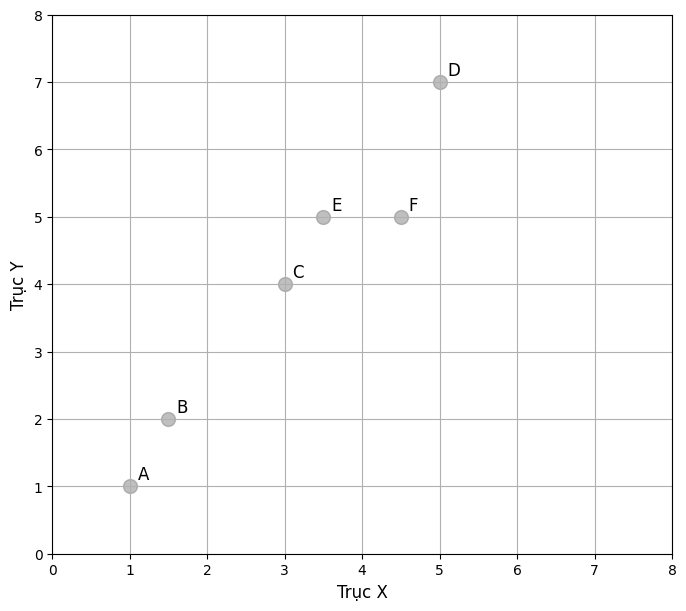

In [6]:
# Mô phỏng thuật toán KMeans
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from IPython.display import HTML # Dùng để hiển thị trong Jupyter Notebook/Colab

# --- Dữ liệu và Cài đặt Ban đầu ---

points_names = ['A', 'B', 'C', 'D', 'E', 'F']
data = np.array([
    [1.0, 1.0],  # A
    [1.5, 2.0],  # B
    [3.0, 4.0],  # C
    [5.0, 7.0],  # D
    [3.5, 5.0],  # E
    [4.5, 5.0]   # F
])
k = 2
initial_centroids = np.array([
    [5.0, 2.0],  # mu_1
    [1.0, 6.0]   # mu_2
])

# Hàm tính khoảng cách Euclid
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2)**2))

# --- Bước 1: Chạy trước thuật toán và lưu lại lịch sử ---
# (Phần này giữ nguyên, không thay đổi)
print("Đang chạy trước thuật toán K-Means để thu thập dữ liệu cho animation...")

centroids = np.copy(initial_centroids)
max_iterations = 10

centroid_history = [np.copy(centroids)]
assignment_history = []
text_history = ["Bắt đầu: Chọn tâm cụm ban đầu"]

for iteration in range(max_iterations):
    # Gán điểm
    assignments = np.zeros(len(data), dtype=int)
    for i, point in enumerate(data):
        distances = [euclidean_distance(point, centroid) for centroid in centroids]
        assignments[i] = np.argmin(distances)

    assignment_history.append(np.copy(assignments))
    centroid_history.append(np.copy(centroids))
    text_history.append(f"Vòng {iteration + 1}: Gán điểm vào cụm gần nhất")

    # Cập nhật tâm
    old_centroids = np.copy(centroids)
    for i in range(k):
        points_in_cluster = data[assignments == i]
        if len(points_in_cluster) > 0:
            centroids[i] = np.mean(points_in_cluster, axis=0)

    assignment_history.append(np.copy(assignments))
    centroid_history.append(np.copy(centroids))
    text_history.append(f"Vòng {iteration + 1}: Cập nhật tâm cụm")

    # Kiểm tra hội tụ
    if np.all(old_centroids == centroids):
        text_history[-1] = f"Hội tụ sau vòng {iteration + 1}! Tâm cụm không đổi."
        print(f"Thuật toán hội tụ sau {iteration + 1} vòng lặp.")
        break

print("Đã thu thập xong dữ liệu. Bắt đầu tạo animation...")

# --- Bước 2: Tạo Animation với thay đổi ở phần vẽ tâm cụm ---

fig, ax = plt.subplots(figsize=(8, 7))
# ### THAY ĐỔI 1: Định nghĩa màu cho tâm cụm và các điểm ###
# Màu xanh cho cụm 1, màu cam cho cụm 2
cluster_colors = ['#1f77b4', '#ff7f0e']

# Hàm khởi tạo animation
def init():
    ax.clear()
    ax.set_xlim(0, 8)
    ax.set_ylim(0, 8)
    ax.set_xlabel('Trục X', fontsize=12)
    ax.set_ylabel('Trục Y', fontsize=12)
    ax.grid(True)
    ax.scatter(data[:, 0], data[:, 1], c='gray', s=100, alpha=0.5)
    for i, name in enumerate(points_names):
        ax.text(data[i, 0] + 0.1, data[i, 1] + 0.1, name, fontsize=12, color='black')
    return []

# Hàm cập nhật cho mỗi frame của animation
def update(frame):
    ax.clear()
    init() # Vẽ lại nền cho mỗi frame

    current_centroids = centroid_history[frame]
    current_assignments = assignment_history[frame-1] if frame > 0 else np.full(len(data), -1)

    # Vẽ các điểm dữ liệu với màu của cụm tương ứng
    point_colors = [cluster_colors[a] if a != -1 else 'gray' for a in current_assignments]
    ax.scatter(data[:, 0], data[:, 1], c=point_colors, s=100, alpha=0.7, edgecolors='k')

    # Vẽ các đường nối từ điểm đến tâm cụm
    if frame % 2 != 0:
        for i, point in enumerate(data):
            centroid_idx = current_assignments[i]
            if centroid_idx != -1:
                centroid = current_centroids[centroid_idx]
                ax.plot([point[0], centroid[0]], [point[1], centroid[1]],
                        color=cluster_colors[centroid_idx], linestyle='--', alpha=0.5)

    # ### THAY ĐỔI 2: Vẽ các tâm cụm với màu tương ứng ###
    # Thay vì dùng 'red', ta truyền vào danh sách màu `cluster_colors`.
    # `ax.scatter` sẽ tự động lấy màu tương ứng cho mỗi điểm.
    # Bỏ 'label' để tránh làm lộn xộn chú thích, vì màu đã đủ rõ ràng.
    ax.scatter(current_centroids[:, 0], current_centroids[:, 1],
               c=cluster_colors, # Dùng danh sách màu
               marker='*',
               s=350, # Tăng kích thước một chút cho nổi bật
               edgecolors='black',
               zorder=10) # zorder để đảm bảo tâm cụm luôn nổi lên trên

    # Cập nhật tiêu đề
    ax.set_title(f'K-Means: {text_history[frame]}', fontsize=14)

    # Tạo chú thích một cách thủ công để đẹp hơn
    from matplotlib.lines import Line2D
    legend_elements = [
        Line2D([0], [0], marker='o', color='w', label='Cụm 1',
               markerfacecolor=cluster_colors[0], markersize=10),
        Line2D([0], [0], marker='o', color='w', label='Cụm 2',
               markerfacecolor=cluster_colors[1], markersize=10),
        Line2D([0], [0], marker='*', color='w', label='Tâm cụm',
               markerfacecolor='gray', markeredgecolor='k', markersize=15)
    ]
    ax.legend(handles=legend_elements, loc='upper left')


# Tạo đối tượng animation
ani = FuncAnimation(fig, update, frames=len(centroid_history), init_func=init, blit=False, interval=2000, repeat=False)

# Lưu animation thành file GIF
try:
    ani.save('kmeans_animation_colored_centroids.gif', writer='pillow', fps=0.5)
    print("\nĐã tạo thành công file 'kmeans_animation_colored_centroids.gif'.")
except Exception as e:
    print(f"\nLỗi khi lưu file GIF: {e}")
    print("Hãy chắc chắn bạn đã cài đặt thư viện 'Pillow': pip install Pillow")

## Implementing K-Means Clustering (Exercise)

### Your Task

Complete the `MyKMeans` class implementation below. This exercise will help you understand how K-Means clustering works by implementing each step of the algorithm.

**What you need to implement:**
1. **Centroid Initialization**: Randomly select k initial centroids
2. **Distance Calculation**: Compute distances from points to centroids
3. **Cluster Assignment**: Assign each point to the nearest centroid
4. **Centroid Update**: Recalculate centroids as the mean of assigned points
5. **Convergence Check**: Determine when the algorithm should stop

**Key Mathematical Concepts:**
- **Euclidean Distance**: $d(x, \mu) = \sqrt{\sum_{i=1}^{d}(x_i - \mu_i)^2}$
- **Centroid Update**: $\mu_j = \frac{1}{|C_j|} \sum_{x \in C_j} x$
- **Convergence**: Stop when centroids don't change significantly


Hãy hoàn thành việc triển khai lớp `MyKMeans` dưới đây. Bài tập này sẽ giúp bạn hiểu cách hoạt động của phân cụm K-Means bằng cách triển khai từng bước của thuật toán.

**Bạn cần triển khai những gì:**
1. **Khởi tạo tâm cụm**: Chọn ngẫu nhiên k tâm cụm ban đầu
2. **Tính toán khoảng cách**: Tính toán khoảng cách từ các điểm đến các tâm cụm
3. **Gán cụm**: Gán mỗi điểm cho tâm cụm gần nhất
4. **Cập nhật tâm cụm**: Tính toán lại các tâm cụm là giá trị trung bình của các điểm được gán
5. **Kiểm tra hội tụ**: Xác định khi nào thuật toán nên dừng lại

**Các khái niệm toán học chính:**
- **Khoảng cách Euclidean**: $d(x, \mu) = \sqrt{\sum_{i=1}^{d}(x_i - \mu_i)^2}$
- **Cập nhật tâm cụm**: $\mu_j = \frac{1}{|C_j|} \sum_{x \in C_j} x$
- **Hội tụ**: Dừng khi các tâm cụm không thay đổi đáng kể


In [33]:
class MyKMeans:
    """
    K-Means clustering implementation from scratch.

    This class demonstrates the fundamental K-Means algorithm with clear implementation steps.
    Students should complete the missing implementations marked with TODO.
    """

    def __init__(self, n_clusters, max_iters=500, random_state=None):
        """
        Initialize K-Means clustering.

        Parameters:
        -----------
        n_clusters : int
            Number of clusters to form
        max_iters : int
            Maximum number of iterations
        random_state : int
            Random seed for reproducibility
        """
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None

    def _initialize_centroids(self, X):
        """
        Initialize centroids randomly from the data points.

        Parameters:
        -----------
        X : numpy.ndarray
            Input data of shape (n_samples, n_features)

        Returns:
        --------
        centroids : numpy.ndarray
            Initial centroids of shape (n_clusters, n_features)
        """
        if self.random_state is not None:
            np.random.seed(self.random_state)
        random_indices = np.random.permutation(X.shape[0])
        centroids = X[random_indices[:self.n_clusters]]
        return centroids

    def _assign_clusters(self, X):
        """
        Assign each data point to the nearest centroid.

        Parameters:
        -----------
        X : numpy.ndarray
            Input data of shape (n_samples, n_features)

        Returns:
        --------
        cluster_assignments : numpy.ndarray
            Cluster assignment for each point of shape (n_samples,)
        """
        #  TODO 13: Calculate distances from each point to each centroid
        # Initialize distance matrix: (n_samples, n_clusters)
        distances = np.zeros((X.shape[0], self.n_clusters))

        #  TODO 14: For each centroid, calculate distance to all points
        # Hint: Use np.linalg.norm() with axis=1 for row-wise distances
        for i, centroid in enumerate(self.centroids if self.centroids is not None else []):
            distances[:, i] = np.linalg.norm(X - centroid, axis=1)  # Replace with: np.linalg.norm(X - centroid, axis=1)

        #  TODO 15: Assign each point to the nearest centroid
        # Hint: Use np.argmin() with axis=1
        cluster_assignments = np.argmin(distances, axis=1) # Replace with: np.argmin(distances, axis=1)

        return cluster_assignments

    def _update_centroids(self, X, cluster_assignments):
        """
        Update centroids based on current cluster assignments.

        Parameters:
        -----------
        X : numpy.ndarray
            Input data of shape (n_samples, n_features)
        cluster_assignments : numpy.ndarray
            Current cluster assignments

        Returns:
        --------
        new_centroids : numpy.ndarray
            Updated centroids of shape (n_clusters, n_features)
        """
        # TODO 16: Initialize new centroids array
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))

        #  TODO 17: For each cluster, calculate the mean of assigned points
        for i in range(self.n_clusters):
            # Get all points assigned to cluster i
            points_in_cluster = X[cluster_assignments == i]  # Replace with: X[cluster_assignments == i]

            #  TODO 18: Calculate new centroid as mean of assigned points
            if len(points_in_cluster) > 0:
                new_centroids[i] = np.mean(points_in_cluster, axis=0)  # Replace with: np.mean(points_in_cluster, axis=0)
            else:
                # Keep old centroid if no points assigned
                new_centroids[i] = self.centroids[i] if self.centroids is not None else np.zeros(X.shape[1])

        return new_centroids

    def fit(self, X):
        """
        Fit K-Means clustering to the data.

        Parameters:
        -----------
        X : numpy.ndarray
            Input data of shape (n_samples, n_features)

        Returns:
        --------
        cluster_assignments : numpy.ndarray
            Final cluster assignments
        """
        #  TODO 19: Initialize centroids
        self.centroids = self._initialize_centroids(X)  # Replace with: self._initialize_centroids(X)

        #  TODO 20: Main K-Means iteration loop
        for iteration in range(self.max_iters):
            # Step 1: Assign points to nearest centroids
            cluster_assignments = self._assign_clusters(X)  # Replace with: self._assign_clusters(X)

            # Step 2: Update centroids
            new_centroids = self._update_centroids(X, cluster_assignments)  # Replace with: self._update_centroids(X, cluster_assignments)

            #  TODO 21: Check for convergence
            # If centroids haven't changed much, we can stop
            if np.allclose(self.centroids, new_centroids):
                print(f"Converged after {iteration + 1} iterations")
                break

            #  TODO 22: Update centroids for next iteration
            self.centroids = new_centroids  # Replace with: new_centroids

        return cluster_assignments

    def predict(self, X):
        """
        Predict cluster assignments for new data.

        Parameters:
        -----------
        X : numpy.ndarray
            New data to predict

        Returns:
        --------
        cluster_assignments : numpy.ndarray
            Predicted cluster assignments
        """
        if self.centroids is None:
            raise ValueError("KMeans instance has not been fitted yet.")

        #  TODO 23: Use the existing _assign_clusters method
        return self._assign_clusters(X)  # Replace with: self._assign_clusters(X)


In [27]:
# Đáp án
class MyKMeans:
    def __init__(self, n_clusters, max_iters=500, random_state=None):
        self.n_clusters = n_clusters
        self.max_iters = max_iters
        self.random_state = random_state
        self.centroids = None

    def _initialize_centroids(self, X):
        if self.random_state is not None:
            np.random.seed(self.random_state)
        random_indices = np.random.permutation(X.shape[0])
        centroids = X[random_indices[:self.n_clusters]]
        return centroids

    def _assign_clusters(self, X):
        distances = np.zeros((X.shape[0], self.n_clusters))
        for i, centroid in enumerate(self.centroids):
            distances[:, i] = np.linalg.norm(X - centroid, axis=1)
        cluster_assignments = np.argmin(distances, axis=1)
        return cluster_assignments

    def _update_centroids(self, X, cluster_assignments):
        new_centroids = np.zeros((self.n_clusters, X.shape[1]))
        for i in range(self.n_clusters):
            points_in_cluster = X[cluster_assignments == i]
            if len(points_in_cluster) > 0:
                new_centroids[i] = np.mean(points_in_cluster, axis=0)
            else:
                new_centroids[i] = self.centroids[i]
        return new_centroids

    def fit(self, X):
        self.centroids = self._initialize_centroids(X)
        for _ in range(self.max_iters):
            cluster_assignments = self._assign_clusters(X)
            new_centroids = self._update_centroids(X, cluster_assignments)
            if np.allclose(self.centroids, new_centroids):
                break
            self.centroids = new_centroids
        return cluster_assignments

    def predict(self, X):
        if self.centroids is None:
            raise ValueError("KMeans instance has not been fitted yet.")
        return self._assign_clusters(X)

# Introduction to the Dataset for K-Means Clustering

## Dataset Overview

The dataset, stored in `train_ex4.csv`, contains neuroimaging data from the ABIDEII-NYU_2 study, specifically for a subject (ID: 29164) aged 6.194 years diagnosed with cancer. The data includes measurements of surface area (`fsArea`), volume (`fsVol`), local gyrification index (`fsLGI`), and cortical thickness (`fsCT`) for various regions of interest (ROIs) in both the left (L) and right (R) hemispheres of the brain. These measurements correspond to 180 distinct ROIs per metric, resulting in a high-dimensional feature set with 720 total features (180 ROIs × 4 metrics: `fsArea_L`, `fsArea_R`, `fsVol_L`, `fsVol_R`, `fsLGI_L`, `fsLGI_R`, `fsCT_L`, `fsCT_R`).

Dữ liệu, được lưu trữ trong `train_ex4.csv`, chứa dữ liệu hình ảnh thần kinh từ nghiên cứu ABIDEII-NYU_2, đặc biệt cho một đối tượng (ID: 29164) 6.194 tuổi được chẩn đoán mắc bệnh ung thư. Dữ liệu bao gồm các phép đo diện tích bề mặt (`fsArea`), thể tích (`fsVol`), chỉ số cuộn não cục bộ (`fsLGI`) và độ dày vỏ não (`fsCT`) cho các vùng quan tâm (ROI) khác nhau ở cả bán cầu não trái (L) và phải (R). Các phép đo này tương ứng với 180 ROI riêng biệt cho mỗi chỉ số, dẫn đến một tập hợp đặc trưng có số chiều cao với tổng cộng 720 đặc trưng (180 ROI × 4 chỉ số: `fsArea_L`, `fsArea_R`, `fsVol_L`, `fsVol_R`, `fsLGI_L`, `fsLGI_R`, `fsCT_L`, `fsCT_R`).

## Data Characteristics

### Number of Samples
The dataset contains a single sample for analysis, representing one subject. For K-means clustering, this dataset would typically be part of a larger collection of subjects to enable meaningful clustering, but here we focus on understanding the structure for a single subject's data.

Tập dữ liệu này chỉ chứa một mẫu duy nhất để phân tích, đại diện cho một đối tượng. Đối với phân cụm K-means, tập dữ liệu này thường là một phần của bộ sưu tập lớn hơn các đối tượng để cho phép phân cụm có ý nghĩa, nhưng ở đây chúng ta tập trung vào việc tìm hiểu cấu trúc dữ liệu của một đối tượng duy nhất.

### Features
The dataset includes 720 numerical features, primarily brain measurements:

- **Surface Area (`fsArea`)**: Measures the surface area of cortical regions (e.g., `fsArea_L_V1_ROI`, `fsArea_R_V1_ROI`).
- **Volume (`fsVol`)**: Measures the volume of cortical regions (e.g., `fsVol_L_V1_ROI`, `fsVol_R_V1_ROI`).
- **Local Gyrification Index (`fsLGI`)**: Quantifies the degree of cortical folding (e.g., `fsLGI_L_V1_ROI`, `fsLGI_R_V1_ROI`).
- **Cortical Thickness (`fsCT`)**: Measures the thickness of the cortex (e.g., `fsCT_L_V1_ROI`, `fsCT_R_V1_ROI`).


Tập dữ liệu bao gồm 720 đặc trưng số, chủ yếu là các phép đo não:

- **Diện tích bề mặt (`fsArea`)**: Đo diện tích bề mặt của các vùng vỏ não (ví dụ: `fsArea_L_V1_ROI`, `fsArea_R_V1_ROI`).
- **Thể tích (`fsVol`)**: Đo thể tích của các vùng vỏ não (ví dụ: `fsVol_L_V1_ROI`, `fsVol_R_V1_ROI`).
- **Chỉ số cuộn não cục bộ (`fsLGI`)**: Định lượng mức độ gấp khúc của vỏ não (ví dụ: `fsLGI_L_V1_ROI`, `fsLGI_R_V1_ROI`).
- **Độ dày vỏ não (`fsCT`)**: Đo độ dày của vỏ não (ví dụ: `fsCT_L_V1_ROI`, `fsCT_R_V1_ROI`).

### Target Variable
The `group` column indicates the subject's diagnosis (Cancer), which may serve as a reference for clustering but is not typically used in unsupervised K-means clustering.

Cột `group` cho biết chẩn đoán của đối tượng (Ung thư), có thể dùng làm tham chiếu cho việc phân cụm nhưng thường không được sử dụng trong phân cụm K-means không giám sát.

### Additional Metadata
Includes `site` (ABIDEII-NYU_2), `subject` (29164), and `age` (6.194 years), which provide context but are not used directly in K-means clustering.

Bao gồm `site` (ABIDEII-NYU_2), `subject` (29164) và `age` (6.194 tuổi), cung cấp ngữ cảnh nhưng không được sử dụng trực tiếp trong phân cụm K-means.

## Application to K-Means Clustering

K-means clustering is an unsupervised machine learning algorithm that partitions data into `k` clusters based on feature similarity. For this dataset, K-means can be applied to group subjects (if more samples are available) based on their neuroimaging profiles, potentially identifying patterns in brain morphology associated with conditions like cancer or other neurological characteristics. Key considerations for applying K-means to this dataset include:

- **Feature Selection**: With 720 features, dimensionality reduction (e.g., PCA) may be necessary to reduce noise and computational complexity while preserving variance.
- **Preprocessing**: Features should be standardized (e.g., z-score normalization) to ensure equal contribution to the clustering process, as the features (area, volume, LGI, thickness) have different scales.
- **Number of Clusters (`k`)**: The choice of `k` can be determined using methods like the elbow method or silhouette score, depending on the number of subjects and the desired granularity of clusters.
- **Challenges**: The high dimensionality and potential correlations between features (e.g., left and right hemisphere measurements for the same ROI) may require careful preprocessing to avoid redundant information affecting cluster quality.


Phân cụm K-means là một thuật toán học máy không giám sát, phân chia dữ liệu thành `k` cụm dựa trên sự tương đồng về đặc trưng. Đối với tập dữ liệu này, K-means có thể được áp dụng để nhóm các đối tượng (nếu có nhiều mẫu hơn) dựa trên hồ sơ hình ảnh thần kinh của họ, có khả năng xác định các mẫu trong hình thái não liên quan đến các tình trạng như ung thư hoặc các đặc điểm thần kinh khác. Các cân nhắc chính khi áp dụng K-means cho tập dữ liệu này bao gồm:

- **Lựa chọn đặc trưng**: Với 720 đặc trưng, việc giảm chiều (ví dụ: PCA) có thể cần thiết để giảm nhiễu và độ phức tạp tính toán trong khi vẫn giữ được phương sai.
- **Tiền xử lý**: Các đặc trưng nên được chuẩn hóa (ví dụ: chuẩn hóa z-score) để đảm bảo đóng góp như nhau vào quá trình phân cụm, vì các đặc trưng (diện tích, thể tích, LGI, độ dày) có các thang đo khác nhau.
- **Số lượng cụm (`k`)**: Việc lựa chọn `k` có thể được xác định bằng cách sử dụng các phương pháp như phương pháp khuỷu tay (elbow method) hoặc điểm silhouette, tùy thuộc vào số lượng đối tượng và mức độ chi tiết của các cụm mong muốn.
- **Thách thức**: Số chiều cao và các tương quan tiềm ẩn giữa các đặc trưng (ví dụ: các phép đo bán cầu não trái và phải cho cùng một ROI) có thể yêu cầu tiền xử lý cẩn thận để tránh thông tin dư thừa ảnh hưởng đến chất lượng cụm.

## Objective

The goal of applying K-means clustering to this dataset is to identify natural groupings of subjects based on their brain measurements, which could reveal insights into structural differences related to cancer or other conditions. For a single subject, this dataset serves as a template for preprocessing and feature engineering before clustering a larger cohort.

Mục tiêu của việc áp dụng phân cụm K-means cho tập dữ liệu này là để xác định các nhóm tự nhiên của các đối tượng dựa trên các phép đo não của họ, điều này có thể tiết lộ những hiểu biết sâu sắc về sự khác biệt cấu trúc liên quan đến ung thư hoặc các tình trạng khác. Đối với một đối tượng duy nhất, tập dữ liệu này đóng vai trò là một mẫu để tiền xử lý và kỹ thuật đặc trưng trước khi phân cụm một nhóm lớn hơn.

In [9]:
df_abide = pd.read_csv('train_ex4.csv')
print("Thông tin dataset ABIDE II (đã chỉnh sửa):")
print(f"Số dòng: {df_abide.shape[0]}, Số cột: {df_abide.shape[1]}")
print("\n5 dòng đầu của dataset:")

print(df_abide.head())

print("\nThông tin các cột:")
print(df_abide.info())


X_abide_features = df_abide.drop('group', axis=1)
y_abide_true_labels = df_abide['group']
print("\nSố lượng mẫu theo nhãn 'group':")
print(y_abide_true_labels.value_counts())
X_abide_np = X_abide_features.values
y_abide_numeric = y_abide_true_labels.map({'Normal': 0, 'Cancer': 1}).values


Thông tin dataset ABIDE II (đã chỉnh sửa):
Số dòng: 1004, Số cột: 1445

5 dòng đầu của dataset:
   Unnamed: 0            site  subject        age   group  fsArea_L_V1_ROI  \
0           0   ABIDEII-KKI_1    29293   8.893151  Cancer           2750.0   
1           1  ABIDEII-OHSU_1    28997  12.000000  Cancer           2836.0   
2           2    ABIDEII-GU_1    28845   8.390000  Normal           3394.0   
3           3   ABIDEII-NYU_1    29210   8.300000  Cancer           3382.0   
4           4   ABIDEII-EMC_1    29894   7.772758  Normal           3080.0   

   fsArea_L_MST_ROI  fsArea_L_V6_ROI  fsArea_L_V2_ROI  fsArea_L_V3_ROI  ...  \
0             306.0            354.0           2123.0           1451.0  ...   
1             186.0            354.0           2261.0           1584.0  ...   
2             223.0            373.0           2827.0           1816.0  ...   
3             266.0            422.0           2686.0           1893.0  ...   
4             161.0            346.0    

# Understanding Your Data with EVR and CEVR

## Explained Variance Ratio (EVR)

### What it tells you
EVR shows how much information each principal component captures.

EVR cho thấy mỗi thành phần chính nắm bắt được bao nhiêu thông tin.

### Simple interpretation
- **EVR₁ = 0.60** → “PC1 captures 60 % of all data variation.”  
- **EVR₂ = 0.25** → “PC2 captures 25 % of all data variation.”

- **EVR₁ = 0.60** → “PC1 nắm bắt 60% tổng biến thiên dữ liệu.”
- **EVR₂ = 0.25** → “PC2 nắm bắt 25% tổng biến thiên dữ liệu.”
---

## Cumulative Explained Variance Ratio (CEVR)

### What it tells you
CEVR shows how much total information you keep when using the first *k* components.

CEVR cho thấy tổng lượng thông tin bạn giữ lại khi sử dụng $k$ thành phần chính đầu tiên.

### Simple interpretation
- **CEVR₃ = 0.90** → “First 3 PCs together capture 90 % of all data variation.”  
- **CEVR₅ = 0.95** → “First 5 PCs together capture 95 % of all data variation.”

- **CEVR₃ = 0.90** → “3 PC đầu tiên cùng nhau nắm bắt 90% tổng biến thiên dữ liệu.”
- **CEVR₅ = 0.95** → “5 PC đầu tiên cùng nhau nắm bắt 95% tổng biến thiên dữ liệu.”

---

## How to Use EVR and CEVR to Understand Your Data

### Good‑Quality Data
- **EVR pattern**: First few components are large (EVR₁ > 0.3).  
- **CEVR pattern**: Reaches 90 %+ quickly (within 3–5 components).  
- **Meaning**: Your data has clear structure and patterns.

- **Mô hình EVR**: Một vài thành phần đầu tiên lớn (EVR₁ > 0.3).
- **Mô hình CEVR**: Đạt 90%+ nhanh chóng (trong vòng 3-5 thành phần).
- **Ý nghĩa**: Dữ liệu của bạn có cấu trúc và mẫu rõ ràng.

### Noisy/Complex Data
- **EVR pattern**: All components are similar and small.  
- **CEVR pattern**: Need many components to reach 90 %.  
- **Meaning**: Your data is noisy or truly high‑dimensional.

- **Mô hình EVR**: Tất cả các thành phần đều tương tự và nhỏ.
- **Mô hình CEVR**: Cần nhiều thành phần để đạt 90%.
- **Ý nghĩa**: Dữ liệu của bạn nhiễu hoặc thực sự có số chiều cao.

---

## How Many Components to Keep?
Common rule: keep components until **CEVR ≥ 0.95** (retain 95 % of information).

Quy tắc phổ biến: giữ các thành phần cho đến khi **CEVR $\ge$ 0.95** (giữ lại 95% thông tin).




Khảo sát n_components cho PCA:
[[255.0 255.0 304.0 ... 2.629 2.699 3.179]
 [226.0 184.0 136.0 ... 2.67 2.7460000000000004 3.324]
 [280.0 248.0 170.0 ... 2.891 2.94 3.232]
 ...
 [215.0 210.0 200.0 ... 2.899 3.029 3.292]
 [259.0 240.0 198.0 ... 2.704 3.076 3.114]
 [274.0 223.0 146.0 ... 2.637 3.263 2.9810000000000003]]
n_components = 150, Cumulative Explained Variance Ratio = 0.8295
[[255.0 255.0 304.0 ... 2.629 2.699 3.179]
 [226.0 184.0 136.0 ... 2.67 2.7460000000000004 3.324]
 [280.0 248.0 170.0 ... 2.891 2.94 3.232]
 ...
 [215.0 210.0 200.0 ... 2.899 3.029 3.292]
 [259.0 240.0 198.0 ... 2.704 3.076 3.114]
 [274.0 223.0 146.0 ... 2.637 3.263 2.9810000000000003]]
n_components = 220, Cumulative Explained Variance Ratio = 0.8886
[[255.0 255.0 304.0 ... 2.629 2.699 3.179]
 [226.0 184.0 136.0 ... 2.67 2.7460000000000004 3.324]
 [280.0 248.0 170.0 ... 2.891 2.94 3.232]
 ...
 [215.0 210.0 200.0 ... 2.899 3.029 3.292]
 [259.0 240.0 198.0 ... 2.704 3.076 3.114]
 [274.0 223.0 146.0 ... 2.637 3.

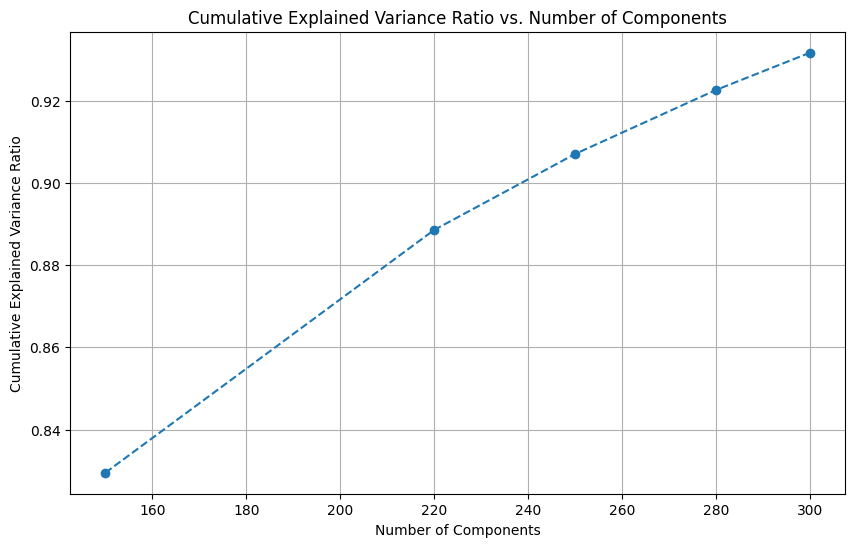


Không đạt CEVR 0.95. Chọn tạm n_components_optimal = 300


In [36]:
X_abide_np = X_abide_np[:, 2:]
cevr_list = []
component_range = [150,220,250,280,300]
if X_abide_np.shape[1] < 100:
    component_range = range(1, X_abide_np.shape[1]+1)


print("Khảo sát n_components cho PCA:")
for n in component_range:
    if n > X_abide_np.shape[1]: continue
    pca_survey = MyPCA(n_components=n)
    print(X_abide_np)
    pca_survey.fit(X_abide_np)
    cevr = pca_survey.cumulative_explained_variance_ratio_
    cevr_list.append(cevr[-1])
    print(f"n_components = {n}, Cumulative Explained Variance Ratio = {cevr[-1]:.4f}")



plt.figure(figsize=(10, 6))
plt.plot(component_range, cevr_list, marker='o', linestyle='--')
plt.title('Cumulative Explained Variance Ratio vs. Number of Components')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()


optimal_k = -1
for i, cevr_val in enumerate(cevr_list):
    if cevr_val >= 0.95:
        optimal_k = component_range[i]
        print(f"\nChọn n_components_optimal = {optimal_k} (CEVR >= 0.95)")
        break
if optimal_k == -1:
    optimal_k = component_range[np.argmax(cevr_list)]
    print(f"\nKhông đạt CEVR 0.95. Chọn tạm n_components_optimal = {optimal_k}")



In [37]:
my_pca = MyPCA(n_components=300)
my_pca.fit(X_abide_np)
print("Explained Variance Ratio (EVR):", my_pca.explained_variance_ratio_)
print("Cumulative Explained Variance Ratio (CEVR):", my_pca.cumulative_explained_variance_ratio_)
# print("Components (eigenvectors):\n", my_pca.components_)

# Transform the data
X_transformed = my_pca.transform(X_abide_np)
print("\nTransformed data X_transformed (shape {}):\n{}".format(X_transformed.shape, X_transformed))
N_CLUSTERS = 2 # Vì có 2 nhóm: Cancer và Normal
my_kmeans = MyKMeans(n_clusters=N_CLUSTERS, random_state=42) # random_state để kết quả có thể tái lặp

# Fit K-Means trên dữ liệu đã qua PCA
cluster_labels_pred = my_kmeans.fit(X_transformed)
# cluster_labels_pred sẽ là một mảng chứa 0 hoặc 1 cho mỗi điểm dữ liệu

print("Một vài nhãn cụm dự đoán:", cluster_labels_pred[:20])

Explained Variance Ratio (EVR): [0.25377251 0.1018926  0.02201524 0.01551562 0.01352521 0.01239375
 0.0112274  0.01008355 0.00942896 0.00874505 0.00811783 0.00769232
 0.0074081  0.00728933 0.00675155 0.00672835 0.0065106  0.00623541
 0.00611709 0.00576491 0.00559917 0.00544283 0.00537877 0.00527893
 0.00513389 0.00511181 0.00488488 0.00475825 0.00469004 0.00464101
 0.00451066 0.00431054 0.00423797 0.00416395 0.00406672 0.00400337
 0.00393665 0.0038679  0.00382912 0.00373826 0.00362766 0.00359281
 0.00353639 0.00347024 0.00340856 0.00335485 0.00327929 0.00326766
 0.0031715  0.00308197 0.00307412 0.00298993 0.00296441 0.00291012
 0.00283293 0.00279832 0.00277877 0.00271149 0.00270658 0.00266129
 0.00264224 0.00258738 0.00254651 0.00251002 0.00247793 0.00243756
 0.00241824 0.00234473 0.00233997 0.00231048 0.00228282 0.00225481
 0.00220753 0.00219717 0.00217073 0.00214949 0.00213534 0.00210238
 0.0020839  0.00204914 0.00204524 0.00202607 0.00199586 0.00196176
 0.001939   0.00193    0.00191

In [38]:
y_abide_true_numeric = np.array([1 if label == 'Cancer' else 0 for label in y_abide_true_labels])
contingency_matrix = np.zeros((N_CLUSTERS, N_CLUSTERS), dtype=int) # Giả sử nhãn gốc cũng có N_CLUSTERS giá trị duy nhất
unique_true_labels = np.unique(y_abide_true_numeric) # Sẽ là [0, 1]

for i in range(N_CLUSTERS): # Lặp qua các cluster dự đoán (0, 1)
    for j_idx, j_true_val in enumerate(unique_true_labels): # Lặp qua các nhãn thực (0, 1)
        contingency_matrix[i, j_idx] = np.sum((cluster_labels_pred == i) & (y_abide_true_numeric == j_true_val))

print("Contingency Matrix (rows: predicted clusters, cols: true labels 0, 1):")
print(contingency_matrix)
acc1 = np.mean(cluster_labels_pred == y_abide_true_numeric)
# Case 2: cluster 0 -> true 1, cluster 1 -> true 0
acc2 = np.mean((1 - cluster_labels_pred) == y_abide_true_numeric)

final_pred_labels = None
if acc1 >= acc2:
    final_pred_labels = cluster_labels_pred
    print("Mapping: Cluster 0 -> True Label 0, Cluster 1 -> True Label 1 (dựa trên accuracy)")
else:
    final_pred_labels = 1 - cluster_labels_pred
    print("Mapping: Cluster 0 -> True Label 1, Cluster 1 -> True Label 0 (dựa trên accuracy)")

def calculate_metrics(y_true, y_pred, positive_label=1): # Giả sử positive_label là 1 (Cancer)
    tp = np.sum((y_true == positive_label) & (y_pred == positive_label))
    tn = np.sum((y_true != positive_label) & (y_pred != positive_label))
    fp = np.sum((y_true != positive_label) & (y_pred == positive_label))
    fn = np.sum((y_true == positive_label) & (y_pred != positive_label))

    accuracy = (tp + tn) / (tp + tn + fp + fn) if (tp + tn + fp + fn) > 0 else 0
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0 # Còn gọi là Sensitivity
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    return accuracy, precision, recall, f1_score

print("\n--- Đánh giá kết quả phân cụm ---")

accuracy, precision, recall, f1_score = calculate_metrics(y_abide_true_numeric, final_pred_labels, positive_label=1)

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision (for 'Cancer'): {precision:.4f}")
print(f"Recall (for 'Cancer'): {recall:.4f}")
print(f"F1-score (for 'Cancer'): {f1_score:.4f}")



Contingency Matrix (rows: predicted clusters, cols: true labels 0, 1):
[[190 194]
 [351 269]]
Mapping: Cluster 0 -> True Label 1, Cluster 1 -> True Label 0 (dựa trên accuracy)

--- Đánh giá kết quả phân cụm ---
Accuracy: 0.5428
Precision (for 'Cancer'): 0.5052
Recall (for 'Cancer'): 0.4190
F1-score (for 'Cancer'): 0.4581


Explained Variance Ratio (EVR): [0.25377251 0.1018926  0.02201524]
Cumulative Explained Variance Ratio (CEVR): [0.25377251 0.35566512 0.37768035]

Đang chuẩn bị để vẽ biểu đồ cho dữ liệu đã giảm chiều...
Số chiều mới của dữ liệu: 3
Vẽ biểu đồ 3D scatter plot...


/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7847 (\N{LATIN SMALL LETTER A WITH CIRCUMFLEX AND GRAVE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7921 (\N{LATIN SMALL LETTER U WITH HORN AND DOT BELOW}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7919 (\N{LATIN SMALL LETTER U WITH HORN AND TILDE}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 7879 (\N{LATIN SMALL LETTER E WITH CIRCUMFLEX AND DOT BELOW}) missing from font(s) Liberation Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Gly

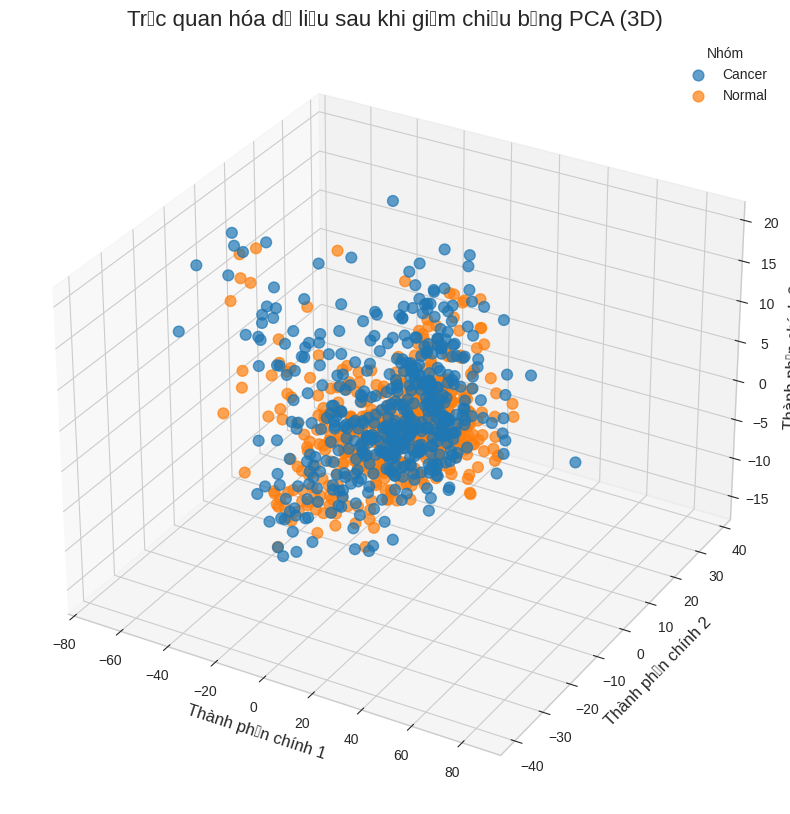

In [39]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D # Cần cho biểu đồ 3D
my_pca = MyPCA(n_components=3)
my_pca.fit(X_abide_np)
print("Explained Variance Ratio (EVR):", my_pca.explained_variance_ratio_)
print("Cumulative Explained Variance Ratio (CEVR):", my_pca.cumulative_explained_variance_ratio_)
# print("Components (eigenvectors):\n", my_pca.components_)

# Transform the data
X_transformed = my_pca.transform(X_abide_np)
# --- Giả lập lại dữ liệu và kết quả của bạn để code có thể chạy độc lập ---
# (Trong code của bạn, bạn đã có sẵn các biến này rồi)
# df_abide = pd.read_csv('train_ex4.csv')
# X_abide_features = df_abide.drop('group', axis=1)
# y_abide_true_labels = df_abide['group']
# X_abide_np = X_abide_features.values
# # Giả sử X_transformed đã được tạo từ lớp MyPCA của bạn
# # Ví dụ cho trường hợp 2D:
# # X_transformed = my_pca_2d.transform(X_abide_np)
# # Ví dụ cho trường hợp 3D:
# # X_transformed = my_pca_3d.transform(X_abide_np)
# # --- Kết thúc phần giả lập ---


# ==============================================================================
# BẠN HÃY DÁN ĐOẠN CODE BÊN DƯỚI VÀO SAU KHI ĐÃ CÓ BIẾN `X_transformed`
# ==============================================================================

print(f"\nĐang chuẩn bị để vẽ biểu đồ cho dữ liệu đã giảm chiều...")
print(f"Số chiều mới của dữ liệu: {X_transformed.shape[1]}")

# Lấy số chiều từ kết quả transform
n_components = X_transformed.shape[1]

# Thiết lập style cho biểu đồ đẹp hơn
plt.style.use('seaborn-v0_8-whitegrid')

# Trường hợp 1: Vẽ biểu đồ 2D
if n_components == 2:
    print("Vẽ biểu đồ 2D scatter plot...")

    # Tạo một DataFrame tạm thời để vẽ với Seaborn cho tiện và đẹp
    df_pca = pd.DataFrame({
        'Principal Component 1': X_transformed[:, 0],
        'Principal Component 2': X_transformed[:, 1],
        'group': y_abide_true_labels # Sử dụng nhãn gốc để chú thích
    })

    plt.figure(figsize=(12, 8))
    sns.scatterplot(
        x='Principal Component 1',
        y='Principal Component 2',
        hue='group', # Tô màu theo nhóm 'Normal' và 'Cancer'
        data=df_pca,
        palette=['#1f77b4', '#ff7f0e'], # Xanh cho Normal, Cam cho Cancer
        s=70, # Kích thước điểm
        alpha=0.7 # Độ trong suốt để thấy sự chồng chéo
    )

    plt.title('Trực quan hóa dữ liệu sau khi giảm chiều bằng PCA (2D)', fontsize=16)
    plt.xlabel('Thành phần chính 1', fontsize=12)
    plt.ylabel('Thành phần chính 2', fontsize=12)
    plt.legend(title='Nhóm')
    plt.show()

# Trường hợp 2: Vẽ biểu đồ 3D
elif n_components == 3:
    print("Vẽ biểu đồ 3D scatter plot...")

    fig = plt.figure(figsize=(14, 10))
    ax = fig.add_subplot(111, projection='3d')

    # Chúng ta cần vẽ từng nhóm một để gán màu và nhãn
    groups = y_abide_true_labels.unique()
    colors = ['#1f77b4', '#ff7f0e']

    for group, color in zip(groups, colors):
        # Lọc ra các chỉ số (indices) của các điểm thuộc nhóm hiện tại
        indices_to_keep = (y_abide_true_labels == group)

        # Vẽ các điểm của nhóm này lên biểu đồ 3D
        ax.scatter(
            X_transformed[indices_to_keep, 0],
            X_transformed[indices_to_keep, 1],
            X_transformed[indices_to_keep, 2],
            c=color,
            label=group,
            s=60,
            alpha=0.7
        )

    ax.set_title('Trực quan hóa dữ liệu sau khi giảm chiều bằng PCA (3D)', fontsize=16)
    ax.set_xlabel('Thành phần chính 1', fontsize=12)
    ax.set_ylabel('Thành phần chính 2', fontsize=12)
    ax.set_zlabel('Thành phần chính 3', fontsize=12)
    ax.legend(title='Nhóm')
    plt.show()

# Trường hợp khác
else:
    print(f"Không thể vẽ biểu đồ 2D/3D cho dữ liệu có {n_components} chiều.")